In [1]:
from collections import defaultdict
from mainless import *

In [2]:
p = Project("../less-main-data/repo_info/juju4_ansible-lufi")

In [3]:
p.toplevels["vars"]

{'Alpine.yml',
 'Debian-9.yml',
 'RedHat-6.yml',
 'RedHat-7.yml',
 'Ubuntu-12.04.yml',
 'Ubuntu-14.04.yml',
 'Ubuntu-16.04.yml',
 'Ubuntu-18.04.yml'}

In [4]:
paths, toplevels = load_paths_from_file("../less-main-data/repo_info/juju4_ansible-lufi")

In [5]:
count_directory_members(toplevels, "vars")

(8, 0)

In [6]:
all_projects = {}

import sys

import os, os.path
for dirpath, dirnames, filenames in os.walk("../less-main-data/repo_info"):
    i = 0
    total = len(filenames)
    for fn in filenames:
        all_projects[fn] = Project(os.path.join(dirpath, fn))
        i += 1
        if i % 1000 == 0: sys.stdout.write(".")
sys.stdout.write("done.\n")           

....................done.


In [7]:
from collections import Counter
stats_for=["defaults", "handlers", "meta", "tasks", "vars"]
counters = {}
counters_main = {}
bingos = {}
present_at_all = {}
for stat in stats_for:
    counters[stat] = Counter()
    counters_main[stat] = Counter()
    bingos[stat] = 0
    present_at_all[stat] = 0
    
for p in all_projects.values():
    for stat in stats_for:
        nonmain, main = p.count_directory_members(stat)
        counters[stat][nonmain] += 1
        counters_main[stat][main] += 1
        if nonmain == 0 and main == 1:
            bingos[stat] += 1
        if nonmain > 0 or main > 0:
            present_at_all[stat] += 1

# We nuke the 0-counts because they make the graph confusing
for stat in stats_for:
    print(stat, bingos[stat])
    counters[stat][0] = 0
    counters_main[stat][0] = 0

defaults 16956
handlers 11571
meta 18537
tasks 9158
vars 7374


In [8]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats(
    "svg", 
#    "retina",
)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()
plt.cool()
font = dict(
#    family="Helvetica", 
    size=15,
)
plt.rcParams["figure.figsize"] = (13,7)
plt.rc('font', **font)

def plot_s(name):
    nonmain_bar = [counters[name][e] for e in range(1,11)]
    main_bar = [counters_main[name][e] for e in range(1,11)]
    ind = np.arange(1,11)    # the x locations for the groups
    width = 0.75       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, nonmain_bar, width)
    p2 = plt.bar(ind, main_bar, width,
                 bottom=nonmain_bar)
    plt.ylabel('Number of Galaxy projects')
    plt.title('Files in '+name+'/')
    xticks = list(ind)
    xticks[-1] = "10+"
    plt.xticks(ind, xticks)
    plt.grid(axis="y")
    plt.legend((p1[0], p2[0]), ('Non-main', 'main.yml/.yaml/.json'))
    plt.show()

<Figure size 640x480 with 0 Axes>

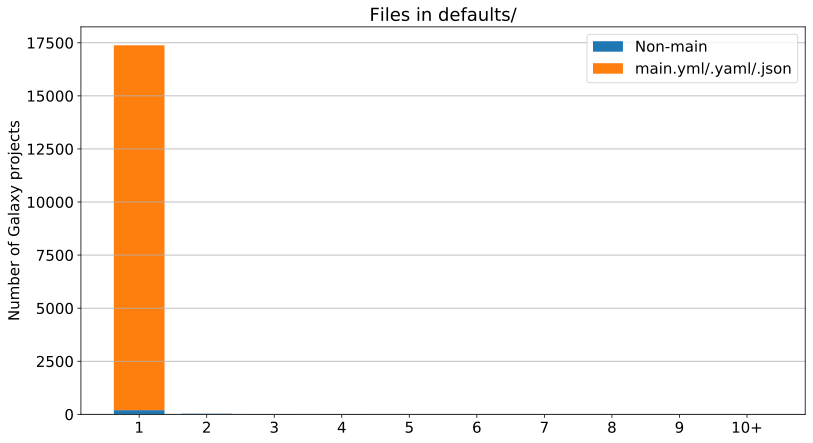

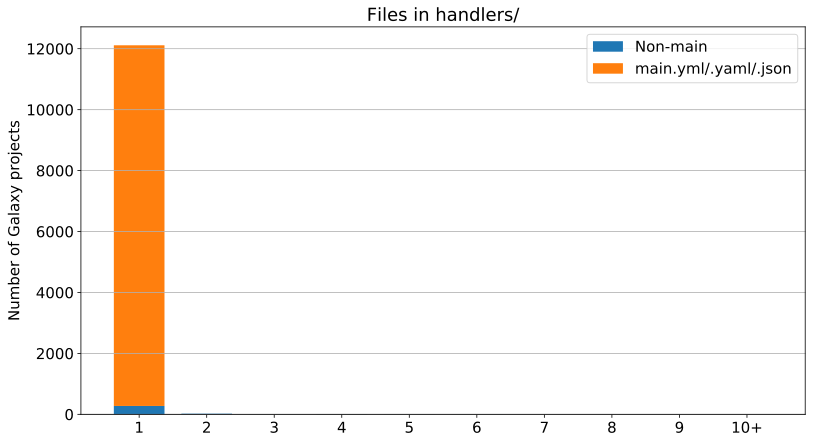

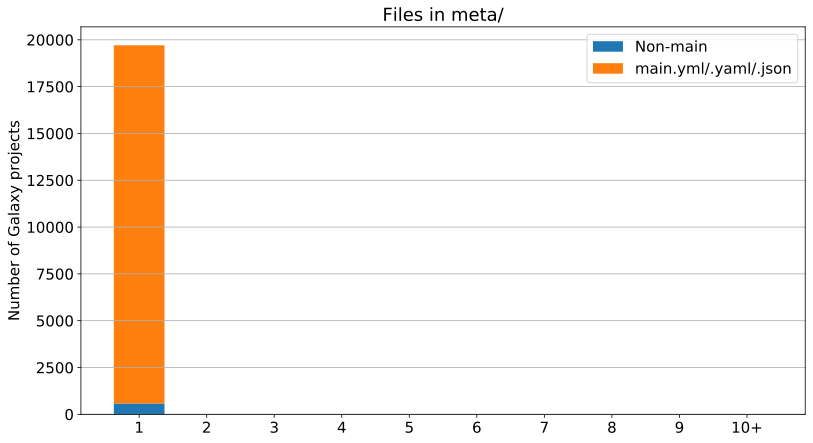

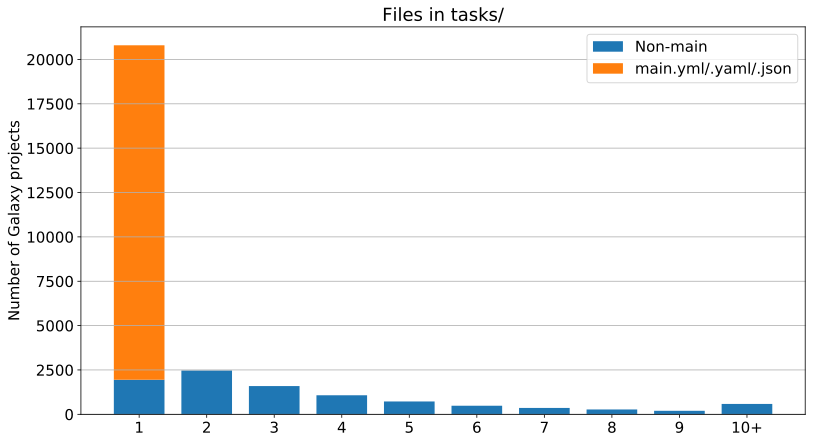

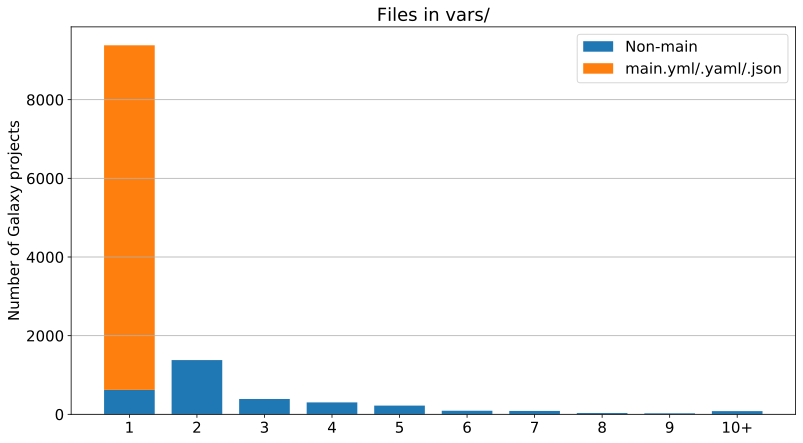

In [10]:
for x in stats_for:
    plot_s(x)

In [11]:
def plot_pie(name):
    total = len(all_projects)
    frac = float(bingos[name]) / total
    not_present = float(total - present_at_all[name]) / total
    multiple = (1.0 - frac) - not_present
    pielist = [frac, multiple, not_present]
    
    colors = ["#90B3E0", "#E19E8F", "#90AC78"]

    labels = [" Only main.yml", " Multiple", " None"]
    explode = [0, 0.05, 0]

    plt.rcParams["figure.figsize"] = (7,5)
    font = dict(
    #    family="Helvetica", 
        size=12,
    )
    plt.rc('font', **font)

    plt.pie(pielist, labels=labels, autopct="%.1f%%", explode=explode, colors=colors)
    plt.title('Files in '+name+'/')
    #plt.show()
    plt.savefig(f"pie_{name}.png")
    plt.show()

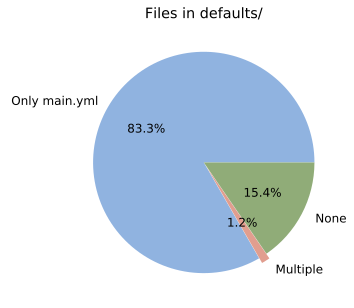

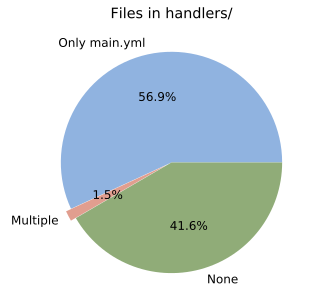

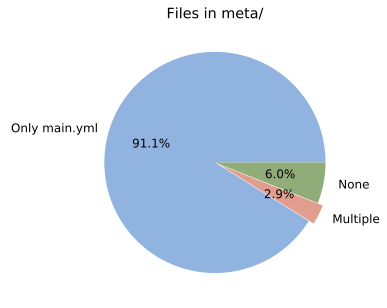

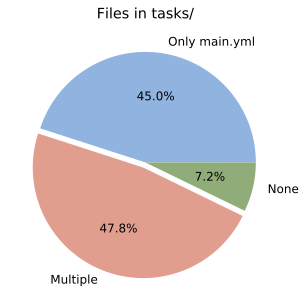

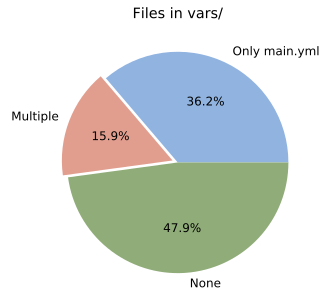

In [12]:
for x in stats_for:
    plot_pie(x)
    